In [1]:
# 분류 시뮬레이션 데이터 생성
import numpy
numpy.random.seed(1)

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=400, n_features=10, n_classes=2)

# 0.7-0.3 비율로 데이터 세트를 학습 세트와 테스트 세트로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
numpy.random.seed(1)

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy')
history = model.fit(X_train, y_train, epochs=300, batch_size=5, validation_data=(X_test, y_test), verbose=0)

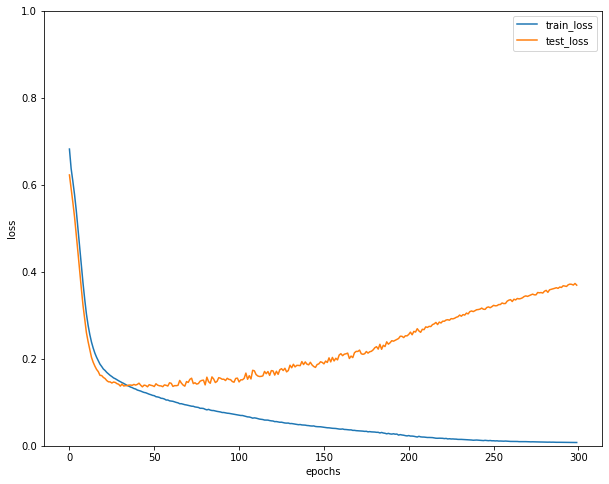

In [7]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

In [9]:
# 조기 중단을 하도록 모델 선언
from keras.callbacks import EarlyStopping
numpy.random.seed(1)

es_callback = EarlyStopping(monitor='val_loss', mode='min')

model2 = Sequential()
model2.add(Dense(16, activation='relu', input_dim=10))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='sgd', loss='binary_crossentropy')
history2 = model2.fit(X_train, y_train, epochs=300, batch_size=5, validation_data=(X_test, y_test), callbacks=[es_callback], verbose=0)

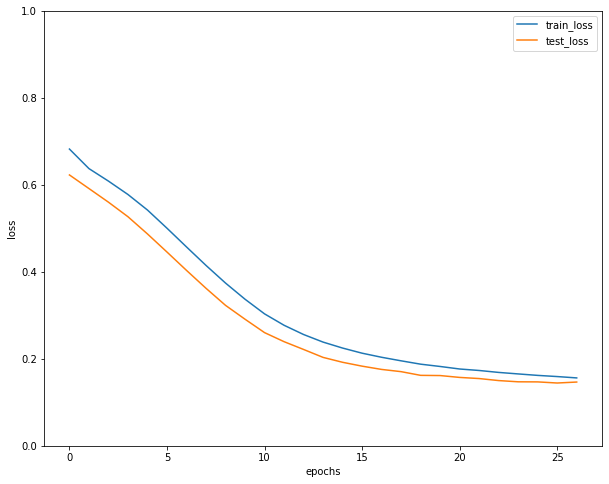

In [10]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'test_loss'], loc='upper right')

In [12]:
es_callback2 = EarlyStopping(monitor='val_loss', mode='min', patience=10)

model3 = Sequential()
model3.add(Dense(16, activation='relu', input_dim=10))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='sgd', loss='binary_crossentropy')
history3 = model3.fit(X_train, y_train, epochs=300, batch_size=5, validation_data=(X_test, y_test), callbacks=[es_callback2], verbose=0)

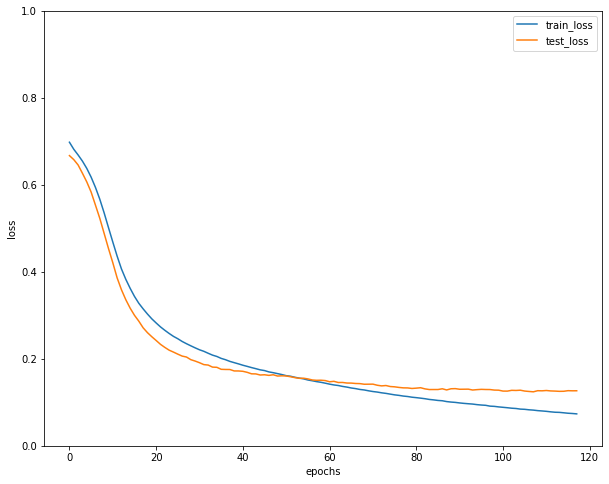

In [13]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'test_loss'], loc='upper right')